## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Our goal is to predict the patient needed a csection.

In [3]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Check whether the data has missing values and remove all rows containing missing values.

In [4]:
# answer below:
csection.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
Age                80 non-null int64
Delivery number    80 non-null int64
Delivery time      80 non-null int64
Blood Pressure     80 non-null int64
Heart Problem      80 non-null int64
Caesarian          80 non-null int64
dtypes: int64(6)
memory usage: 3.9 KB


Examine the distribution of delivery number, blood pressure and heart problem.

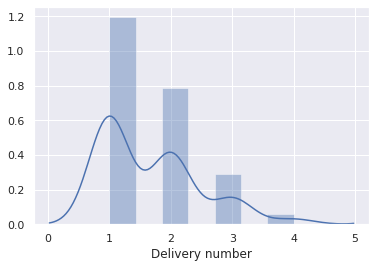

In [6]:
# answer below:
sns.distplot(csection['Delivery number'])

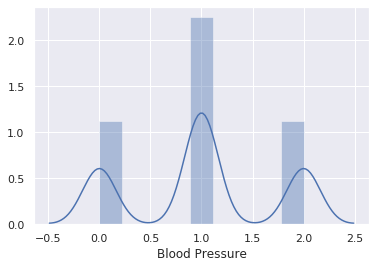

In [7]:
sns.distplot(csection['Blood Pressure'])

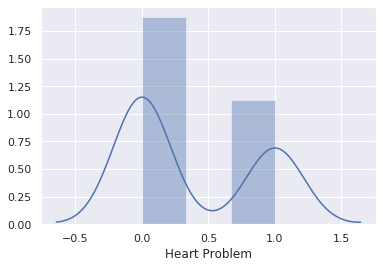

In [8]:
sns.distplot(csection['Heart Problem'])

What are your conclusions from the distribtuions of these variables? Write them below.

In [0]:
# answer below:

# Delivery Number - non-normal, large amount of values in the '1' class
# Blood Pressure - normal
# Heart Problem - non-normal,  most of the values are in the '0' class

Create dummy variables from all columns containing categorical variables with more than two values.

In [0]:
# answer below:
csection_d = pd.concat([csection, pd.get_dummies(csection[['Blood Pressure', 'Delivery time']].astype(str), drop_first= True)], axis = 1)
 

Split the data into test and train with test containing 20% of the data.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

X = csection_d.drop(columns= 'Caesarian')
y = csection_d['Caesarian']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


Use the linear kernel to train a SVC model on our training data. Report the score for the test data.

In [25]:
# answer below:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

print(svm.score(X_test, y_test))
print(svm.score(X_train, y_train))

0.625
0.765625
